In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('seaborn-white')

from datetime import datetime

In [2]:
# Import the Dataset
selected_month = pd.read_csv('2020-Mar.csv.gz', compression='gzip',
                   error_bad_lines=False)
selected_month.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-03-01 00:00:00 UTC,view,10900348,2232732105912091273,appliances.kitchen.mixer,kitfort,117.63,550295099,23f5ab9e-7774-416d-900b-f2725da671aa
1,2020-03-01 00:00:01 UTC,view,14300020,2232732107967300275,apparel.underwear,casio,264.37,622070532,edf19213-f0dd-46e1-ae18-28968dbddd6e
2,2020-03-01 00:00:03 UTC,view,13200063,2232732061804790604,furniture.bedroom.bed,NaN,126.10,552832344,608087d8-6b69-21db-50a3-2b91ba015532
3,2020-03-01 00:00:03 UTC,view,100077498,2232732085846540487,construction.tools.generator,tamina,424.72,613391860,5ab6c3d5-edd7-4e15-8b0a-75b467a37fd0
4,2020-03-01 00:00:04 UTC,view,1005014,2232732093077520756,construction.tools.light,samsung,482.73,517021211,0c34308d-c455-40bb-9992-3e44920bc2b9


In [3]:
selected_month.shape

(56341241, 9)

In [4]:
selected_month.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

QUESTION 3:

            What is the brand whose prices are higher on average?

In [5]:
# Select part of the dataset
Month = selected_month.iloc[:,1:7]
# drop the excess column
Month = Month.drop(columns=['event_type','product_id','category_id']) 
Month.head()

,category_code,brand,price
0,appliances.kitchen.mixer,kitfort,117.63
1,apparel.underwear,casio,264.37
2,furniture.bedroom.bed,NaN,126.10
3,construction.tools.generator,tamina,424.72
4,construction.tools.light,samsung,482.73


In [6]:
# Group the column by category_code and brand and compute the average price
table = Month.groupby(['category_code','brand'], as_index=False)['price'].mean()
# rename the column
table = table.rename(columns={"price": "average_price"})
table

,category_code,brand,average_price
0,accessories.bag,a-derma,5.020000
1,accessories.bag,a-elita,46.035000
2,accessories.bag,acer,26.439159
3,accessories.bag,adidas,2.204107
4,accessories.bag,adili,90.279078
...,...,...,...
11750,stationery.cartrige,vag,64.534667
11751,stationery.cartrige,valeo,24.091429
11752,stationery.cartrige,xerox,49.793412
11753,stationery.cartrige,xiaomi,20.570000


In [7]:
# Split the "category_code" data in category and sub_category
table['category'], table['sub_category'] = table['category_code'].str.split('.', 1).str
table

,category_code,brand,average_price,category,sub_category
0,accessories.bag,a-derma,5.020000,accessories,bag
1,accessories.bag,a-elita,46.035000,accessories,bag
2,accessories.bag,acer,26.439159,accessories,bag
3,accessories.bag,adidas,2.204107,accessories,bag
4,accessories.bag,adili,90.279078,accessories,bag
...,...,...,...,...,...
11750,stationery.cartrige,vag,64.534667,stationery,cartrige
11751,stationery.cartrige,valeo,24.091429,stationery,cartrige
11752,stationery.cartrige,xerox,49.793412,stationery,cartrige
11753,stationery.cartrige,xiaomi,20.570000,stationery,cartrige


In [8]:
# Rearrange the Dataframe "table"
cols = table.columns.tolist()
cols = cols[-3:] + cols[:-3]
table = table[cols]
table

,average_price,category,sub_category,category_code,brand
0,5.020000,accessories,bag,accessories.bag,a-derma
1,46.035000,accessories,bag,accessories.bag,a-elita
2,26.439159,accessories,bag,accessories.bag,acer
3,2.204107,accessories,bag,accessories.bag,adidas
4,90.279078,accessories,bag,accessories.bag,adili
...,...,...,...,...,...
11750,64.534667,stationery,cartrige,stationery.cartrige,vag
11751,24.091429,stationery,cartrige,stationery.cartrige,valeo
11752,49.793412,stationery,cartrige,stationery.cartrige,xerox
11753,20.570000,stationery,cartrige,stationery.cartrige,xiaomi


 - write a function that ask at the user a category in inputs

In [9]:
# Function for plot the category code
def category_code_plot_avg_price(word):
                  
    table2 = table.loc[table['category_code'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the March average price of {word}.')
    plt.show()
    
    return ax

In [10]:
# Function for plot the category
def category_plot_avg_price(word):
                  
    table2 = table.loc[table['category'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the March average price of {word}.')
    plt.show()
    
    return ax

In [11]:
# Function for plot the sub_category
def subcategory_plot_avg_price(word):
                  
    table2 = table.loc[table['sub_category'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the March average price of {word}.')
    plt.show()
    
    return ax

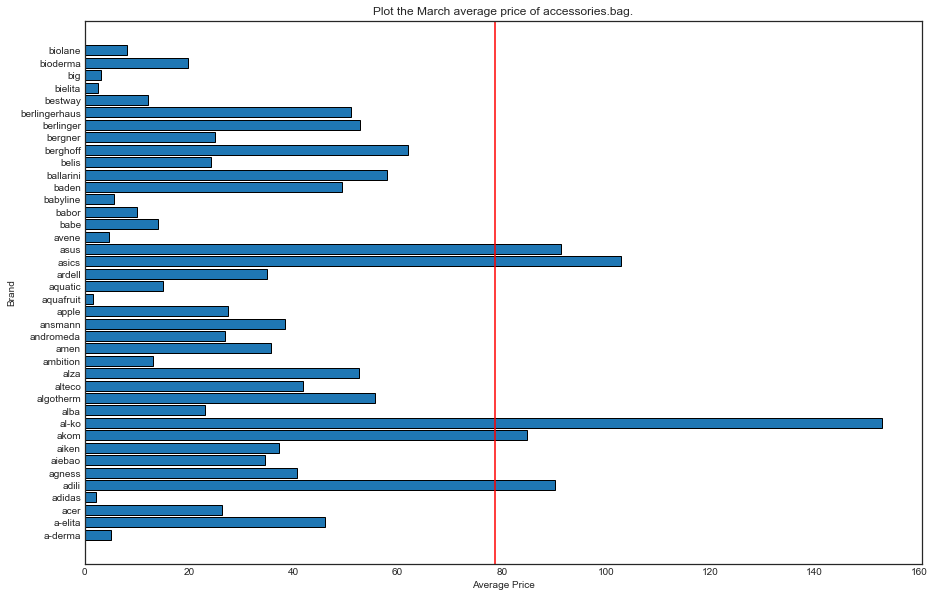

In [12]:
category_code_plot_avg_price('accessories.bag')

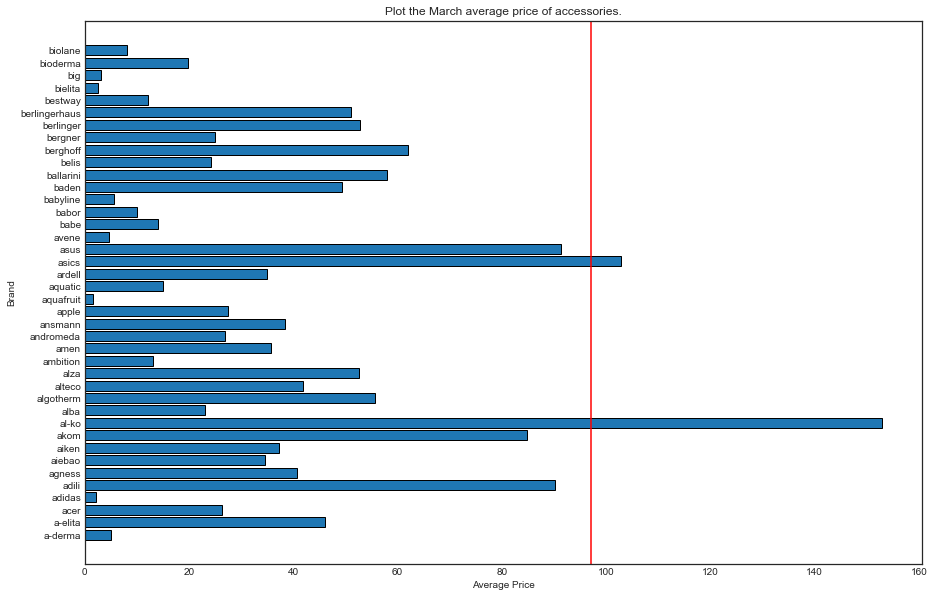

In [13]:
category_plot_avg_price('accessories')

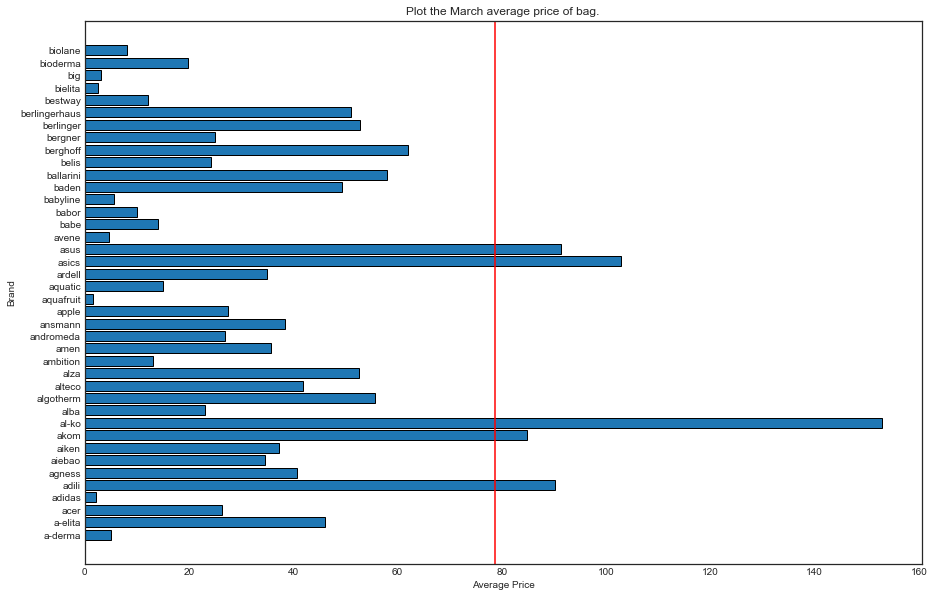

In [14]:
subcategory_plot_avg_price('bag')

 - Find, for each categoty, the brand with the highest average price.

In [15]:
# Find the Category Object with the Maximum Price 
Max_Price = table.groupby(['category'], as_index=False)['average_price'].max()
Max_Price

,category,average_price
0,accessories,1776.081765
1,apparel,2252.310000
2,appliances,2574.040000
3,auto,2290.920000
4,computers,2548.330000
5,construction,2470.850000
6,country_yard,859.740000
7,electronics,2531.053333
8,furniture,2540.269125
9,kids,1801.820000


In [16]:
# Merge the two dataset
merge_dataset = Max_Price.merge(table, on='average_price')
# Select only conversion rate and sort in decring order
Merge_dataset = merge_dataset.drop(columns=['category_y'])
# rename the column
Merge_dataset = Merge_dataset.rename(columns={"category_x": "category", "average_price":"Max_price"})
Dataset_ascending = Merge_dataset.sort_values(by='Max_price', ascending=False, inplace=False)
Dataset_ascending

,category,Max_price,sub_category,category_code,brand
2,appliances,2574.040000,kitchen.coffee_machine,appliances.kitchen.coffee_machine,aeg
4,computers,2548.330000,components.power_supply,computers.components.power_supply,buderus
8,furniture,2540.269125,kitchen.table,furniture.kitchen.table,ego
7,electronics,2531.053333,tablet,electronics.tablet,wacom
5,construction,2470.850000,tools.painting,construction.tools.painting,zipp
12,sport,2372.000000,ski,sport.ski,kessler
3,auto,2290.920000,accessories.winch,auto.accessories.winch,femi
1,apparel,2252.310000,underwear,apparel.underwear,uta
9,kids,1801.820000,notebook,computers.notebook,dreammachines
10,kids,1801.820000,carriage,kids.carriage,hartan


QUESTION 5:

            In what part of the day is your store most visited?

In [17]:
# Select part of the dataset
Month = selected_month.iloc[:,0:5]
Month = Month.drop(columns=['product_id','category_id'])
Month.head()

,event_time,event_type,category_code
0,2020-03-01 00:00:00 UTC,view,appliances.kitchen.mixer
1,2020-03-01 00:00:01 UTC,view,apparel.underwear
2,2020-03-01 00:00:03 UTC,view,furniture.bedroom.bed
3,2020-03-01 00:00:03 UTC,view,construction.tools.generator
4,2020-03-01 00:00:04 UTC,view,construction.tools.light


In [18]:
Month.shape

(56341241, 3)

In [19]:
# Transform the data event_time in datatime
Month.event_time = pd.to_datetime(Month.event_time)

In [20]:
# Hour Visitor
Hour = Month.resample('H', on='event_time').event_type.count()
print(Hour)

event_time
2020-03-01 00:00:00+00:00     8733
2020-03-01 01:00:00+00:00    15723
2020-03-01 02:00:00+00:00    31017
2020-03-01 03:00:00+00:00    49426
2020-03-01 04:00:00+00:00    67651
                             ...  
2020-03-31 19:00:00+00:00    50444
2020-03-31 20:00:00+00:00    32442
2020-03-31 21:00:00+00:00    17949
2020-03-31 22:00:00+00:00    11163
2020-03-31 23:00:00+00:00     7929
Freq: H, Name: event_type, Length: 744, dtype: int64


In [21]:
# Days Visitor
Day = Month.resample('D', on='event_time').event_type.count()
print(Day)

event_time
2020-03-01 00:00:00+00:00    1885112
2020-03-02 00:00:00+00:00    2622171
2020-03-03 00:00:00+00:00    2663469
2020-03-04 00:00:00+00:00    2668990
2020-03-05 00:00:00+00:00    2640332
2020-03-06 00:00:00+00:00    2388222
2020-03-07 00:00:00+00:00    2566717
2020-03-08 00:00:00+00:00    2189868
2020-03-09 00:00:00+00:00    2467349
2020-03-10 00:00:00+00:00    2384210
2020-03-11 00:00:00+00:00    2166744
2020-03-12 00:00:00+00:00    1841110
2020-03-13 00:00:00+00:00    1613483
2020-03-14 00:00:00+00:00    1697198
2020-03-15 00:00:00+00:00    1696629
2020-03-16 00:00:00+00:00    1449104
2020-03-17 00:00:00+00:00    1350626
2020-03-18 00:00:00+00:00    1239183
2020-03-19 00:00:00+00:00    1362232
2020-03-20 00:00:00+00:00    1420652
2020-03-21 00:00:00+00:00    1490521
2020-03-22 00:00:00+00:00    1413592
2020-03-23 00:00:00+00:00    1541088
2020-03-24 00:00:00+00:00    1554488
2020-03-25 00:00:00+00:00    1542916
2020-03-26 00:00:00+00:00    1497233
2020-03-27 00:00:00+00:00  

In [22]:
# Weak Visitor (starting on monday)
Week_Mon = Month.resample('W-MON', on='event_time').event_type.count()
print(Week_Mon)

event_time
2020-03-02 00:00:00+00:00     4507283
2020-03-09 00:00:00+00:00    17584947
2020-03-16 00:00:00+00:00    12848478
2020-03-23 00:00:00+00:00     9817894
2020-03-30 00:00:00+00:00    10199641
2020-04-06 00:00:00+00:00     1382998
Freq: W-MON, Name: event_type, dtype: int64


In [23]:
# group the vistior's view with a range of 3H
Hour_6 = Month.resample('6H', on='event_time').event_type.count()
Hour_6 = pd.DataFrame(Hour_6)
Hour_6

,event_type
event_time,
2020-03-01 00:00:00+00:00,249040
2020-03-01 06:00:00+00:00,538912
2020-03-01 12:00:00+00:00,716682
2020-03-01 18:00:00+00:00,380478
2020-03-02 00:00:00+00:00,427989
...,...
2020-03-30 18:00:00+00:00,175873
2020-03-31 00:00:00+00:00,206011
2020-03-31 06:00:00+00:00,476419


In [24]:
# show in decresing order the view 3H (head)
Hour_6.sort_values(by='event_type', ascending=False, inplace=False).head(15)

,event_type
event_time,
2020-03-03 12:00:00+00:00,1021974
2020-03-04 12:00:00+00:00,1007508
2020-03-02 12:00:00+00:00,971177
2020-03-05 12:00:00+00:00,922052
2020-03-02 06:00:00+00:00,914977
2020-03-05 06:00:00+00:00,907459
2020-03-07 06:00:00+00:00,905628
2020-03-03 06:00:00+00:00,887294
2020-03-09 06:00:00+00:00,881402


In [25]:
# show in decresing order the view 3H (tail)
Hour_6.sort_values(by='event_type', ascending=False, inplace=False).tail(15)

,event_type
event_time,
2020-03-27 18:00:00+00:00,193556
2020-03-25 18:00:00+00:00,193536
2020-03-21 18:00:00+00:00,192811
2020-03-31 18:00:00+00:00,191834
2020-03-26 18:00:00+00:00,190654
2020-03-13 18:00:00+00:00,188567
2020-03-20 18:00:00+00:00,185964
2020-03-22 18:00:00+00:00,185571
2020-03-15 18:00:00+00:00,177599


In [26]:
# Create the daily view with the average hour view
Hour_df = pd.DataFrame(Hour)
Hour_df.reset_index(inplace=True)
Hours = Hour_df.resample('D', on='event_time').event_type.mean()
# Create a dataframe 
Hours_df = pd.DataFrame(Hours)
Hours_df.reset_index(inplace=True)
# Add the column value
Hours_df= Hours_df.rename(columns={'event_type': 'avg_hour_count'})
# add a columns with only the numbers of days
Hours_df['days'] = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,
               20,21,22,23,24,25,26,27,28,29,30,31]
Hours_df

,event_time,avg_hour_count,days
0,2020-03-01 00:00:00+00:00,78546.333333,1
1,2020-03-02 00:00:00+00:00,109257.125000,2
2,2020-03-03 00:00:00+00:00,110977.875000,3
3,2020-03-04 00:00:00+00:00,111207.916667,4
4,2020-03-05 00:00:00+00:00,110013.833333,5
5,2020-03-06 00:00:00+00:00,99509.250000,6
6,2020-03-07 00:00:00+00:00,106946.541667,7
7,2020-03-08 00:00:00+00:00,91244.500000,8
8,2020-03-09 00:00:00+00:00,102806.208333,9
9,2020-03-10 00:00:00+00:00,99342.083333,10


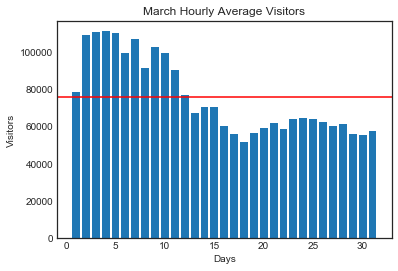

In [27]:
plt.figure()
plt.bar(Hours_df['days'],Hours_df['avg_hour_count'])
plt.axhline(Hours_df['avg_hour_count'].mean(), c='red')
plt.title('March Hourly Average Visitors')
plt.xlabel('Days')
plt.ylabel('Visitors')
plt.show()

QUESTION 6:

            What is the conversion rate of your store?

 - Find the overall conversion rate

In [28]:
# Select part of the dataset
Month = selected_month.iloc[:,1:6]
Month = Month.drop(columns=['brand'])
Month

,event_type,product_id,category_id,category_code
0,view,10900348,2232732105912091273,appliances.kitchen.mixer
1,view,14300020,2232732107967300275,apparel.underwear
2,view,13200063,2232732061804790604,furniture.bedroom.bed
3,view,100077498,2232732085846540487,construction.tools.generator
4,view,1005014,2232732093077520756,construction.tools.light
...,...,...,...,...
56341236,view,1005212,2232732093077520756,construction.tools.light
56341237,view,1701027,2232732099981345295,appliances.personal.massager
56341238,view,2601488,2232732101835227701,NaN
56341239,view,100006963,2232732099754852875,appliances.personal.massager


In [29]:
# Count the number of the event type in the dataset
count = Month['event_type'].value_counts() 
# Transform the result in array
count = np.array(count)
# Find the Overall Conversion Rate
Overall_cr = count[2] / count[0] * 100
Overall_cr

1.9579272601332125

 - Plot the number of purchase per each category and show the conversion rate

In [30]:
#Groupby by the event type and the category code
table = Month.groupby(['category_code','event_type'], as_index=False).count()
# Fix the dataframe
table = table.rename(columns={"product_id": "count"})
table = table.iloc[:,0:3]
table

,category_code,event_type,count
0,accessories.bag,cart,17402
1,accessories.bag,purchase,4653
2,accessories.bag,view,626356
3,accessories.umbrella,cart,904
4,accessories.umbrella,purchase,204
...,...,...,...
403,sport.trainer,purchase,6121
404,sport.trainer,view,750338
405,stationery.cartrige,cart,1008
406,stationery.cartrige,purchase,230


In [31]:
# Selection only purchase value
purchase = table[table['event_type'] == 'purchase']
# Number of purchase in decresing order
purchase_sort = purchase.sort_values(by='count', ascending=False, inplace=False)
purchase_sort

,category_code,event_type,count
257,construction.tools.light,purchase,444249
388,sport.bicycle,purchase,52482
295,electronics.audio.headphone,purchase,36125
161,appliances.personal.massager,purchase,35874
313,electronics.clocks,purchase,27411
...,...,...,...
205,computers.components.hdd,purchase,4
111,appliances.kitchen.coffee_machine,purchase,3
233,computers.peripherals.keyboard,purchase,2
185,auto.accessories.player,purchase,1


In [32]:
# Selection only view value
view = table[table['event_type'] == 'view']
# Merge Purchase and View Dataset
Merge = purchase.merge(view, on='category_code')
Merge = Merge.rename(columns={"category_x": "count"})
Merge

,category_code,event_type_x,count_x,event_type_y,count_y
0,accessories.bag,purchase,4653,view,626356
1,accessories.umbrella,purchase,204,view,49873
2,accessories.wallet,purchase,1509,view,161565
3,apparel.costume,purchase,4006,view,346906
4,apparel.dress,purchase,8,view,2880
...,...,...,...,...,...
128,sport.ski,purchase,2023,view,217930
129,sport.snowboard,purchase,510,view,71585
130,sport.tennis,purchase,461,view,38787
131,sport.trainer,purchase,6121,view,750338


In [33]:
# Split the "category_code" data in category and sub_category
Merge['category'], Merge['sub_category'] = Merge['category_code'].str.split('.', 1).str
Merge = Merge.drop(columns=['sub_category', 'category_code']) 
Merge

,event_type_x,count_x,event_type_y,count_y,category
0,purchase,4653,view,626356,accessories
1,purchase,204,view,49873,accessories
2,purchase,1509,view,161565,accessories
3,purchase,4006,view,346906,apparel
4,purchase,8,view,2880,apparel
...,...,...,...,...,...
128,purchase,2023,view,217930,sport
129,purchase,510,view,71585,sport
130,purchase,461,view,38787,sport
131,purchase,6121,view,750338,sport


In [34]:
Merge = Merge.groupby(['category','event_type_x','event_type_y'], as_index=False).sum()
Merge

,category,event_type_x,event_type_y,count_x,count_y
0,accessories,purchase,view,6366,837794
1,apparel,purchase,view,82312,6440432
2,appliances,purchase,view,142468,9220543
3,auto,purchase,view,6662,448558
4,computers,purchase,view,29443,2247903
5,construction,purchase,view,470373,13929740
6,country_yard,purchase,view,2045,162563
7,electronics,purchase,view,89001,6418866
8,furniture,purchase,view,34404,2678882
9,kids,purchase,view,16539,1471890


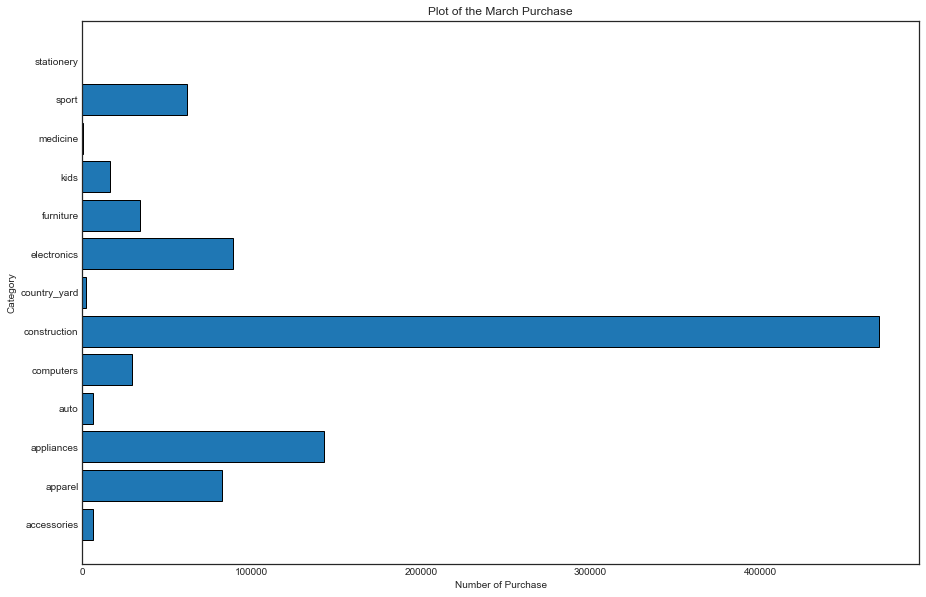

In [35]:
# Make a horizontal bar chart 
plt.figure(figsize = (15, 10))
ax = plt.subplot()
ax.barh(Merge['category'],
        Merge['count_x'], 
            align = 'center', edgecolor = 'k')
plt.xlabel('Number of Purchase')
plt.ylabel('Category')
plt.title('Plot of the March Purchase')
plt.show()

In [36]:
# Add the column 'conversion_rate'
Merge['conversion_rate'] = (Merge['count_x'] / Merge['count_y'])*100
Merge

,category,event_type_x,event_type_y,count_x,count_y,conversion_rate
0,accessories,purchase,view,6366,837794,0.759853
1,apparel,purchase,view,82312,6440432,1.278051
2,appliances,purchase,view,142468,9220543,1.545115
3,auto,purchase,view,6662,448558,1.485204
4,computers,purchase,view,29443,2247903,1.309799
5,construction,purchase,view,470373,13929740,3.376754
6,country_yard,purchase,view,2045,162563,1.257974
7,electronics,purchase,view,89001,6418866,1.386553
8,furniture,purchase,view,34404,2678882,1.284267
9,kids,purchase,view,16539,1471890,1.123657


In [37]:
# Select only conversion rate and sort in decring order
Merge = Merge.drop(columns=['event_type_x','count_x','event_type_y','count_y'])
Merge_dec = Merge.sort_values(by='conversion_rate', ascending=False, inplace=False)
Merge_dec

,category,conversion_rate
5,construction,3.376754
11,sport,2.148312
2,appliances,1.545115
3,auto,1.485204
7,electronics,1.386553
4,computers,1.309799
8,furniture,1.284267
1,apparel,1.278051
6,country_yard,1.257974
9,kids,1.123657


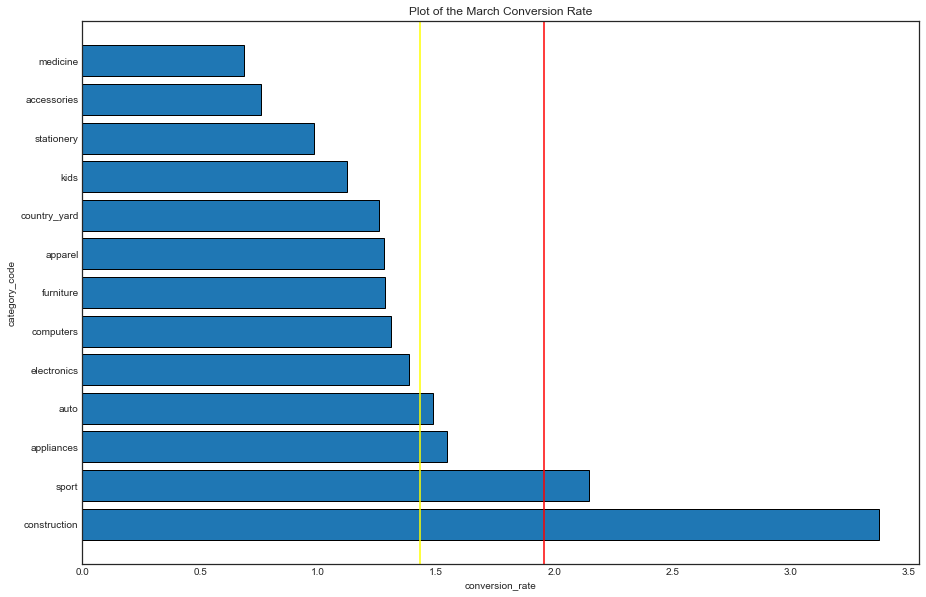

In [38]:
# Make a horizontal bar chart for the conversion rate 
plt.figure(figsize = (15,10))
ax = plt.subplot()
ax.barh(Merge_dec['category'],
        Merge_dec['conversion_rate'], 
            align = 'center', edgecolor = 'k')
plt.axvline(Overall_cr, c='red')
plt.axvline(Merge_dec['conversion_rate'].mean(), c='yellow')
plt.xlabel('conversion_rate')
plt.ylabel('category_code')
plt.title('Plot of the March Conversion Rate')
plt.show()

In [39]:
print(Merge_dec['conversion_rate'])

5     3.376754
11    2.148312
2     1.545115
3     1.485204
7     1.386553
4     1.309799
8     1.284267
1     1.278051
6     1.257974
9     1.123657
12    0.980810
0     0.759853
10    0.684943
Name: conversion_rate, dtype: float64
